In [1]:
import json
import pandas as pd
import numpy as np
from random import randrange
from matplotlib import pyplot as plt
import seaborn as sns

Il seguente notebook viene usato solo per dare uno sguardo alla variabili presenti nel dataset, non verranno modificate ne rimosse

In primo luogo analizziamo le variabili che non costituisco la griglia.

In [2]:
df = pd.read_csv('C:/Users/fra24/OneDrive/Documenti/uni/magistrale/tesi/data/moonboard_2016_cleaned.csv', encoding='utf-8')
df.iloc[:,0:9].head(10)

,name,grade,userGrade,setby,userRating,repeats,isBenchmark,holdsets,apiId
0,Far from the Madding Crowd,6B+,6B+,other,4,24993,True,Hold Set B,19215
1,Wuthering Heights,6B+,6B+,other,4,35673,True,Hold Set A,19216
2,Problem 3,6B+,6B+,other,4,757,False,Original School Holds | Hold Set A | Hold Set B,19217
3,HARD TIMES,7A,7A,other,5,8670,True,Hold Set B,19218
4,Problem 5,7A,7A,other,4,255,False,Hold Set B,19219
5,CRIME AND PUNISHMENT,7B,7B,other,4,253,False,Original School Holds,19220
6,Shortround,6C+,6C+,other,4,550,False,Original School Holds,19221
7,Vurt,7B,7B,other,4,1301,True,Hold Set A | Hold Set B,19222
8,Problem 9,7A+,7A+,other,4,2413,True,Hold Set A | Hold Set B,19223
9,Tess,6C+,6C+,other,4,9617,True,Original School Holds | Hold Set A | Hold Set B,19224


In [3]:
df.iloc[:,0:9].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59506 entries, 0 to 59505
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         59506 non-null  object
 1   grade        59506 non-null  object
 2   userGrade    31427 non-null  object
 3   setby        59506 non-null  object
 4   userRating   59506 non-null  int64 
 5   repeats      59506 non-null  int64 
 6   isBenchmark  59506 non-null  bool  
 7   holdsets     59506 non-null  object
 8   apiId        59506 non-null  int64 
dtypes: bool(1), int64(3), object(5)
memory usage: 3.7+ MB


In [4]:
df.iloc[:,0:9].describe().round(2)

,userRating,repeats,apiId
count,59506.00,59506.00,59506.00
mean,3.40,51.94,347782.21
std,1.72,638.87,95064.18
min,0.00,0.00,19215.00
25%,3.00,1.00,320999.25
50%,4.00,3.00,365410.50
75%,4.00,10.00,415076.25
max,5.00,44491.00,462581.00


***VALORI MANCANTI:***

In [5]:
df.iloc[:,0:9].isna().sum()

name               0
grade              0
userGrade      28079
setby              0
userRating         0
repeats            0
isBenchmark        0
holdsets           0
apiId              0
dtype: int64

***Analisi univariate***

**grade**, livello di difficoltà assegnato dal creatore.

<Axes: ylabel='grade'>

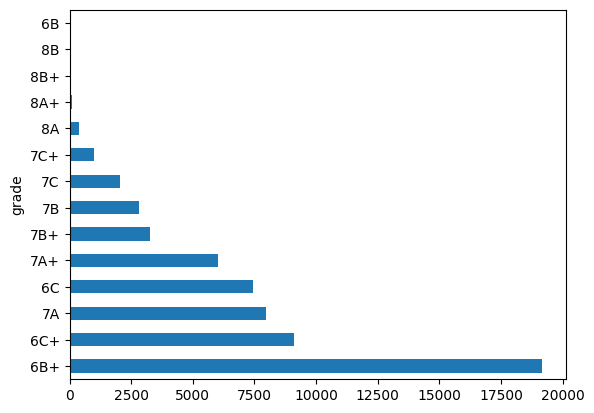

In [6]:
df["grade"].value_counts().plot(kind="barh")

**userGrade**, livello di difficoltà assegnato dagli utenti.

<Axes: ylabel='userGrade'>

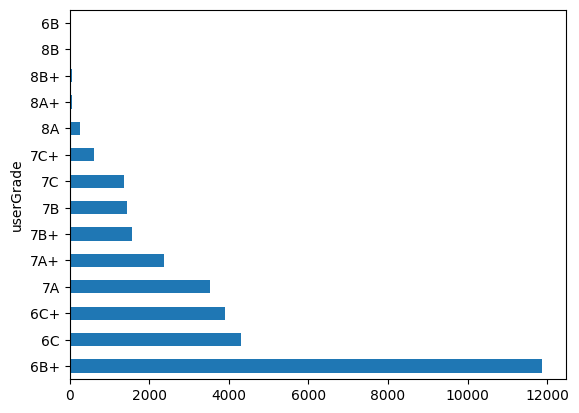

In [7]:
df["userGrade"].value_counts().plot(kind="barh")

**userRating**, valutazione degli utenti del problema.

In [8]:
(df["userRating"].value_counts() / df.shape[0]).sort_index()

userRating
0    0.180990
1    0.010923
2    0.008537
3    0.069741
4    0.491077
5    0.238732
Name: count, dtype: float64

**repeats**, numero di volte che un problema è stato completato.

In [9]:
df["repeats"].describe().round(3)

count    59506.000
mean        51.943
std        638.866
min          0.000
25%          1.000
50%          3.000
75%         10.000
max      44491.000
Name: repeats, dtype: float64

**isBenchmark**, indica se il problema è stato tracciato da Moonboard.

In [10]:
(df["isBenchmark"].value_counts() / df.shape[0]).round(4)

isBenchmark
False    0.9918
True     0.0082
Name: count, dtype: float64

**hasBetaVideo**, se il problema ha un video in cui si mostra la risoluzione. -> RIMOSSO IN PRECEDENZA

**holdsets**, tipo di prese utilizzate per la tracciatura.


In [11]:
df["holdsets"].value_counts() #molti dubbi su questa colonna

holdsets
Original School Holds | Hold Set A | Hold Set B    28758
Hold Set A | Hold Set B                            21484
Original School Holds | Hold Set A                  2580
Hold Set A                                          2040
Original School Holds | Hold Set B                  1945
Hold Set B                                          1533
Original School Holds                               1166
Name: count, dtype: int64

**holdsetup.description**, anno della Moonboard e grado di inclinazione del problema. -> RIMOSSO IN PRECEDENZA

**Variabili A1, A2, ..., K17, K18.**

In [12]:
columns = df.loc[:, "A1":"K18"].columns
result = df[columns].apply(lambda col: col.value_counts() / df.shape[0])

In [13]:
result.iloc[:, 0:5].round(3)

,A1,A2,A3,A4,A5
0,1.0,1.0,1.0,1.0,0.921
1,NaN,NaN,NaN,NaN,0.012
2,NaN,NaN,NaN,NaN,0.067
3,NaN,NaN,NaN,NaN,NaN


In [14]:
result.iloc[:, 193:198].round(3)

,K14,K15,K16,K17,K18
0,0.977,1.0,0.984,1.0,0.898
1,0.023,NaN,0.016,NaN,0.000
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,0.102


In [15]:
result

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,K9,K10,K11,K12,K13,K14,K15,K16,K17,K18
0,1.0,1.0,1.0,1.0,0.921235,0.999983,1.0,1.0,0.969348,0.989497,...,0.964995,0.984405,0.973381,0.990774,0.992656,0.97696,1.0,0.984237,1.0,0.898094
1,NaN,NaN,NaN,NaN,0.011780,NaN,NaN,NaN,0.030652,0.010503,...,0.035005,0.015595,0.026619,0.009226,0.007344,0.02304,NaN,0.015763,NaN,0.000235
2,NaN,NaN,NaN,NaN,0.066985,0.000017,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.101670


In [16]:
# Somma delle ultime tre righe del DataFrame result
sum_last_three_rows = result.iloc[-3:].sum()

# Crea un nuovo DataFrame con la somma come unica riga
result_v2 = pd.DataFrame([sum_last_three_rows], columns=result.columns).round(4)

# Visualizza il nuovo DataFrame
print(result_v2)

    A1   A2   A3   A4      A5   A6   A7   A8      A9     A10  ...     K9  \
0  0.0  0.0  0.0  0.0  0.0788  0.0  0.0  0.0  0.0307  0.0105  ...  0.035   

      K10     K11     K12     K13    K14  K15     K16  K17     K18  
0  0.0156  0.0266  0.0092  0.0073  0.023  0.0  0.0158  0.0  0.1019  

[1 rows x 198 columns]


In [17]:
# Trasforma result_v2 in una matrice 18x11 con ordine per colonne e inverti le righe
matrix_18x11 = result_v2.to_numpy().reshape(18, 11, order='F')[::-1]

# Visualizza la matrice
print(matrix_18x11)

[[0.0711 0.0551 0.0672 0.1799 0.1951 0.     0.1917 0.0642 0.1175 0.
  0.1019]
 [0.     0.     0.     0.0397 0.     0.     0.0702 0.     0.     0.
  0.    ]
 [0.01   0.0541 0.0107 0.0349 0.0902 0.0209 0.02   0.0647 0.0611 0.0206
  0.0158]
 [0.0037 0.0276 0.0447 0.076  0.1618 0.0723 0.0557 0.0145 0.0261 0.
  0.    ]
 [0.032  0.     0.0307 0.0213 0.0522 0.089  0.0595 0.0573 0.1043 0.0148
  0.023 ]
 [0.0117 0.0255 0.11   0.036  0.1078 0.049  0.1391 0.027  0.0261 0.028
  0.0073]
 [0.0114 0.0115 0.0337 0.0455 0.0892 0.0365 0.0256 0.0458 0.0513 0.0172
  0.0092]
 [0.0056 0.0437 0.0147 0.0348 0.0507 0.0722 0.0362 0.0808 0.0339 0.0119
  0.0266]
 [0.0105 0.0443 0.0586 0.0737 0.1204 0.0721 0.0272 0.1614 0.0559 0.025
  0.0156]
 [0.0307 0.0271 0.028  0.0373 0.0348 0.0419 0.0982 0.0546 0.0194 0.0191
  0.035 ]
 [0.     0.0404 0.0338 0.0258 0.1416 0.0251 0.0937 0.0672 0.015  0.0991
  0.0213]
 [0.     0.018  0.0638 0.0164 0.0382 0.0432 0.0246 0.0138 0.0138 0.0302
  0.0186]
 [0.     0.0297 0.0104 0.039  

In [18]:
# Trasforma la matrice in un DataFrame
df_matrix = pd.DataFrame(matrix_18x11, index=range(18, 0, -1), columns=list("ABCDEFGHIJK"))

# Visualizza il DataFrame
print(df_matrix)

         A       B       C       D       E       F       G       H       I  \
18  0.0711  0.0551  0.0672  0.1799  0.1951  0.0000  0.1917  0.0642  0.1175   
17  0.0000  0.0000  0.0000  0.0397  0.0000  0.0000  0.0702  0.0000  0.0000   
16  0.0100  0.0541  0.0107  0.0349  0.0902  0.0209  0.0200  0.0647  0.0611   
15  0.0037  0.0276  0.0447  0.0760  0.1618  0.0723  0.0557  0.0145  0.0261   
14  0.0320  0.0000  0.0307  0.0213  0.0522  0.0890  0.0595  0.0573  0.1043   
13  0.0117  0.0255  0.1100  0.0360  0.1078  0.0490  0.1391  0.0270  0.0261   
12  0.0114  0.0115  0.0337  0.0455  0.0892  0.0365  0.0256  0.0458  0.0513   
11  0.0056  0.0437  0.0147  0.0348  0.0507  0.0722  0.0362  0.0808  0.0339   
10  0.0105  0.0443  0.0586  0.0737  0.1204  0.0721  0.0272  0.1614  0.0559   
9   0.0307  0.0271  0.0280  0.0373  0.0348  0.0419  0.0982  0.0546  0.0194   
8   0.0000  0.0404  0.0338  0.0258  0.1416  0.0251  0.0937  0.0672  0.0150   
7   0.0000  0.0180  0.0638  0.0164  0.0382  0.0432  0.0246  0.01

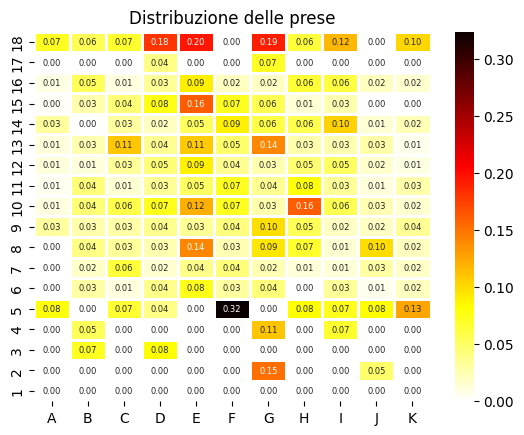

In [19]:
sns.heatmap(df_matrix, annot=True, annot_kws={"size": 6}, fmt=".2f", cbar=True, linewidths=0.8, linecolor='white', cmap="hot_r")
plt.title("Distribuzione delle prese")
plt.show()

In [20]:
df.head(10)

,name,grade,userGrade,setby,userRating,repeats,isBenchmark,holdsets,apiId,A1,...,K9,K10,K11,K12,K13,K14,K15,K16,K17,K18
0,Far from the Madding Crowd,6B+,6B+,other,4,24993,True,Hold Set B,19215,0,...,0,0,0,0,0,0,0,0,0,0
1,Wuthering Heights,6B+,6B+,other,4,35673,True,Hold Set A,19216,0,...,0,0,1,0,0,0,0,0,0,0
2,Problem 3,6B+,6B+,other,4,757,False,Original School Holds | Hold Set A | Hold Set B,19217,0,...,0,0,0,0,0,0,0,0,0,0
3,HARD TIMES,7A,7A,other,5,8670,True,Hold Set B,19218,0,...,0,0,0,0,0,0,0,0,0,0
4,Problem 5,7A,7A,other,4,255,False,Hold Set B,19219,0,...,0,0,0,0,0,0,0,0,0,0
5,CRIME AND PUNISHMENT,7B,7B,other,4,253,False,Original School Holds,19220,0,...,0,0,0,0,0,0,0,0,0,0
6,Shortround,6C+,6C+,other,4,550,False,Original School Holds,19221,0,...,0,0,0,0,0,0,0,0,0,0
7,Vurt,7B,7B,other,4,1301,True,Hold Set A | Hold Set B,19222,0,...,0,0,0,0,0,0,0,0,0,0
8,Problem 9,7A+,7A+,other,4,2413,True,Hold Set A | Hold Set B,19223,0,...,0,0,0,0,0,0,0,0,0,0
9,Tess,6C+,6C+,other,4,9617,True,Original School Holds | Hold Set A | Hold Set B,19224,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_observation(df, apiId):
    relevant_columns = sorted(
        [col for col in df.columns if col[0] in "ABCDEFGHIJK" and col[1:].isdigit()],
        key=lambda x: (x[0], int(x[1:]))
    )
    
    if not relevant_columns:
        print("Nessuna colonna rilevante trovata (A1-K18).")
        return
    
    row = df[df['apiId'] == apiId]
    if row.empty:
        print(f"apiId {apiId} non trovato.")
        return

    name = row['name'].values[0]

    try:
        obs = row[relevant_columns].to_numpy().reshape((11, 18))  # (Y=18, X=11)
    except ValueError as e:
        print(f"Errore durante il reshape: {e}")
        print(f"Assicurati che ci siano esattamente 198 valori (18x11) per apiId {apiId}.")
        return

    # Ruota la matrice di 90 gradi a sinistra
    obs_rotated = np.transpose(obs)[::-1]

    obs = obs_rotated

    # Definisci una mappa di colori personalizzata
    cmap = ListedColormap(["white", "black", "green", "red"])
    bounds = [0, 1, 2, 3, 4]
    norm = plt.Normalize(vmin=0, vmax=3)

    plt.figure(figsize=(6, 6))
    plt.imshow(obs, cmap=cmap, norm=norm, aspect="equal")  

    plt.yticks(ticks=np.arange(18), labels=np.arange(18, 0, -1))  # X da 'A' a 'K'
    plt.xticks(ticks=np.arange(11), labels=list("ABCDEFGHIJK"))  # Y da 18 a 1

    plt.title(f"Problem: {name}")

    plt.show()

    filtered_row = df[df['apiId'] == apiId]

    if not filtered_row.empty:
        print("Grade:", filtered_row['grade'].values[0])
        print("User Grade:", filtered_row['userGrade'].values[0])
        print("Repeats:", filtered_row['repeats'].values[0])
        print("SetBy:", filtered_row['setby'].values[0])
        print("Benchmark:", filtered_row['isBenchmark'].values[0])
    else:
        print("Nessuna osservazione trovata")

In [22]:
import random

def random_apiId_generator(df):
    api_ids = df['apiId'].unique()
    
    while True:
        yield random.choice(api_ids)

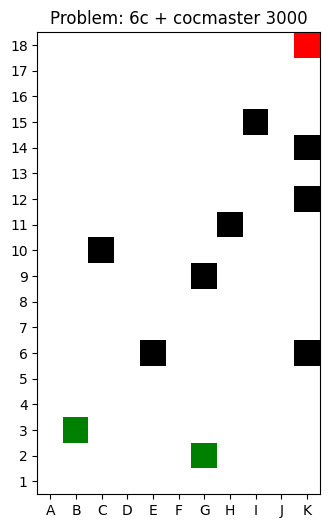

Grade: 6C+
User Grade: 6C+
Repeats: 4
SetBy: other
Benchmark: False


In [23]:
apiId_gen = random_apiId_generator(df)
x = next(apiId_gen)
plot_observation(df, apiId=x)

# STUDIO PRESE:

In [24]:
result

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,K9,K10,K11,K12,K13,K14,K15,K16,K17,K18
0,1.0,1.0,1.0,1.0,0.921235,0.999983,1.0,1.0,0.969348,0.989497,...,0.964995,0.984405,0.973381,0.990774,0.992656,0.97696,1.0,0.984237,1.0,0.898094
1,NaN,NaN,NaN,NaN,0.011780,NaN,NaN,NaN,0.030652,0.010503,...,0.035005,0.015595,0.026619,0.009226,0.007344,0.02304,NaN,0.015763,NaN,0.000235
2,NaN,NaN,NaN,NaN,0.066985,0.000017,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.101670


Cerco le prese che nel setup moonboard 2016 non vengono mai usate, se esistono

In [25]:
unique_cols = [col for col in result.columns if result[col].nunique() == 1]
print(len(unique_cols), "prese mai utilizzate:")
print("Colonne con un solo valore unico:")
print(unique_cols)

57 prese mai utilizzate:
Colonne con un solo valore unico:
['A1', 'A2', 'A3', 'A4', 'A7', 'A8', 'A17', 'B1', 'B2', 'B5', 'B14', 'B17', 'C1', 'C2', 'C3', 'C4', 'C17', 'D1', 'D2', 'D4', 'E1', 'E2', 'E3', 'E4', 'E5', 'E17', 'F1', 'F2', 'F3', 'F4', 'F17', 'F18', 'G1', 'G3', 'G5', 'H1', 'H2', 'H3', 'H4', 'H6', 'H17', 'I1', 'I2', 'I3', 'I17', 'J1', 'J3', 'J4', 'J15', 'J17', 'J18', 'K1', 'K2', 'K3', 'K4', 'K15', 'K17']


Per ora queste prese non vengono rimosse, solo per poter fare un masking comodo

In [26]:
output_path = 'C:/Users/fra24/OneDrive/Documenti/uni/magistrale/tesi/data/moonboard_2016_cleaned_ready_for_masking.csv'
df.to_csv(output_path, index=False, encoding='utf-8')

print(f"Dataset pulito salvato in: {output_path}")

Dataset pulito salvato in: C:/Users/fra24/OneDrive/Documenti/uni/magistrale/tesi/data/moonboard_2016_cleaned_ready_for_masking.csv
